<a href="https://colab.research.google.com/github/Moinkhan15-03-2004/2DArray1/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.drop(columns=['customerID'], inplace=True)

In [13]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
# quick info
print(df.info())
print("\nColumns and dtypes:\n", df.dtypes)
print("\nAny missing values per column:\n", df.isna().sum())
# check unique values for target
print("\nChurn value counts:\n", df['Churn'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# Some TotalCharges entries are blank strings which make dtype object.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Convert spaces/invalids to NaN (coerce did this). Fill them with median (robust).
median_total = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total, inplace=True)
print("TotalCharges dtype:", df['TotalCharges'].dtype)


TotalCharges dtype: float64


In [17]:
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # No -> 0, Yes -> 1
print("Churn mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print(df['Churn'].value_counts())


Churn mapping: {'No': np.int64(0), 'Yes': np.int64(1)}
Churn
0    5174
1    1869
Name: count, dtype: int64


In [19]:
# identify categorical columns (remaining object dtype)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# Use one-hot encoding (get_dummies) for categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Encoded shape:", df_encoded.shape)


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Encoded shape: (7043, 31)


In [20]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns after encoding
num_cols = ['tenure','MonthlyCharges','TotalCharges']  # original numeric
# scale these columns
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [21]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train churn distribution:\n", y_train.value_counts(normalize=True).round(3))


Train shape: (5634, 30) Test shape: (1409, 30)
Train churn distribution:
 Churn
0    0.735
1    0.265
Name: proportion, dtype: float64


In [22]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "NaiveBayes": GaussianNB()
}

# Train all
for name, clf in models.items():
    clf.fit(X_train, y_train)
    print(f"{name} trained.")


LogisticRegression trained.
DecisionTree trained.
RandomForest trained.
SVM trained.
KNN trained.
NaiveBayes trained.



LogisticRegression
Accuracy: 0.8048
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



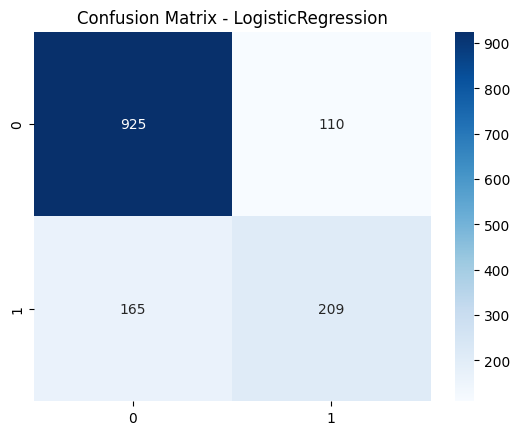

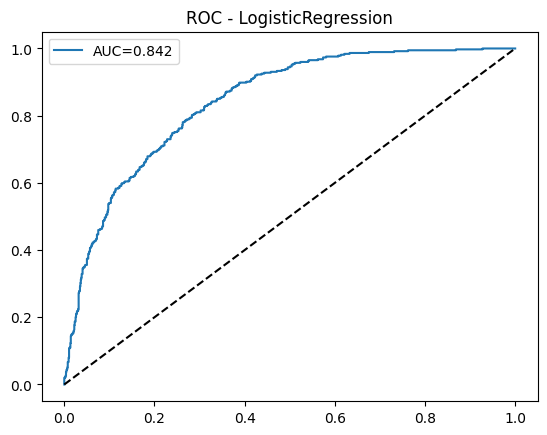

ROC AUC: 0.842

DecisionTree
Accuracy: 0.7424
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1035
           1       0.52      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.67      1409
weighted avg       0.74      0.74      0.74      1409



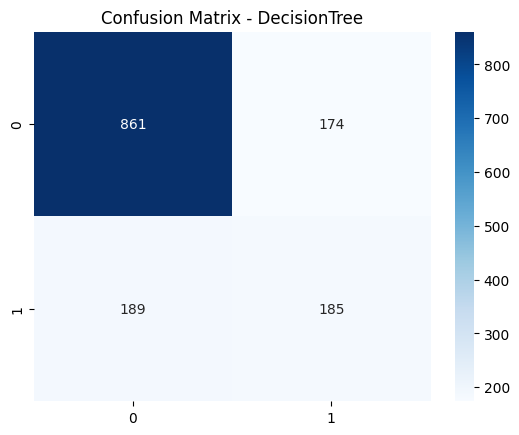

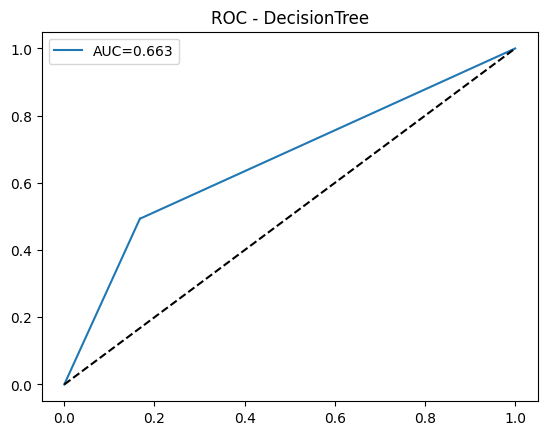

ROC AUC: 0.6628

RandomForest
Accuracy: 0.7899
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



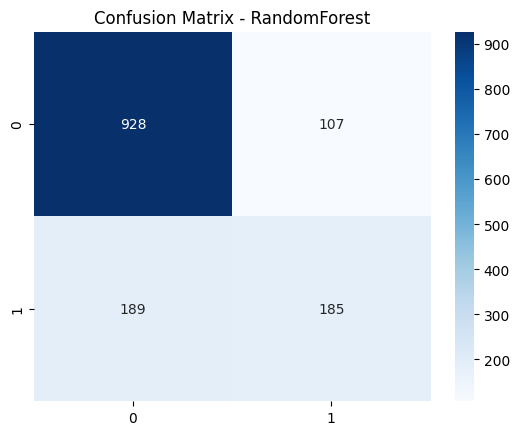

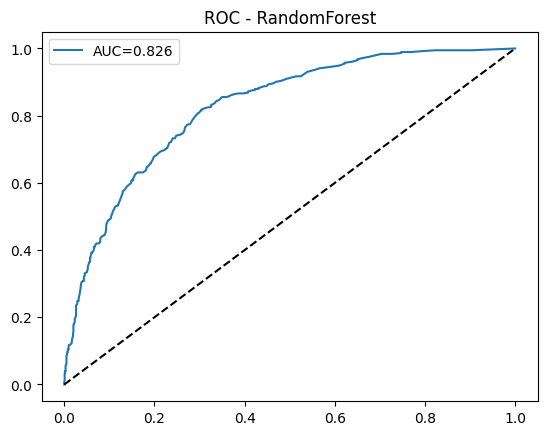

ROC AUC: 0.8261

SVM
Accuracy: 0.7949
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



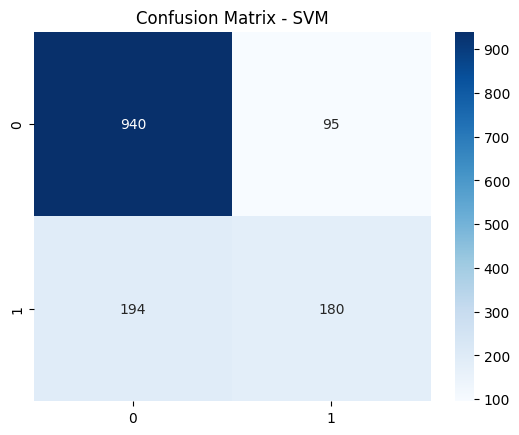

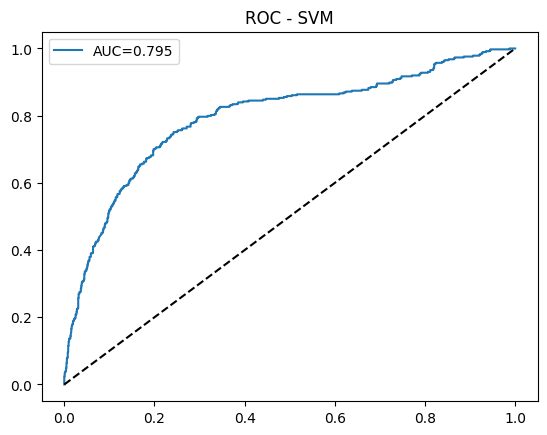

ROC AUC: 0.7949

KNN
Accuracy: 0.763
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409



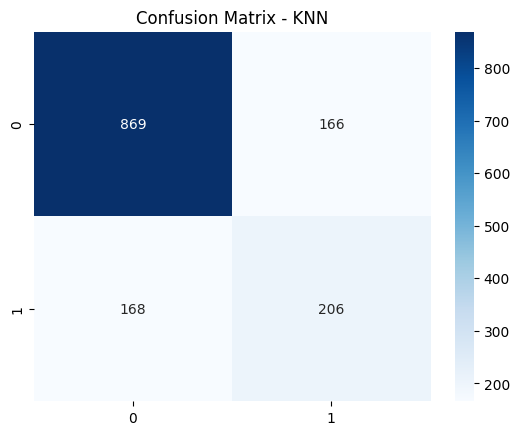

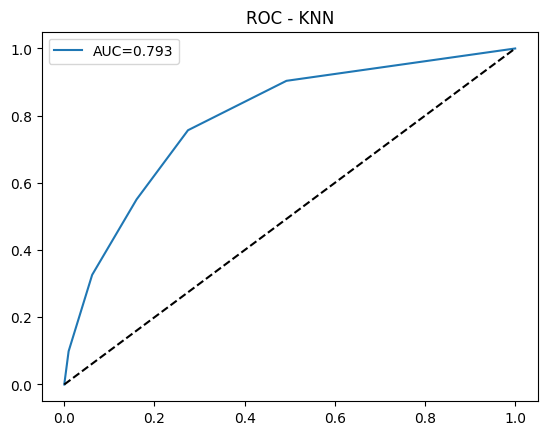

ROC AUC: 0.7934

NaiveBayes
Accuracy: 0.6558
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1035
           1       0.43      0.87      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.67      1409



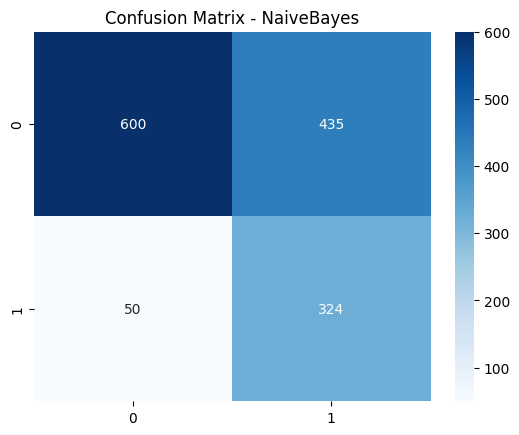

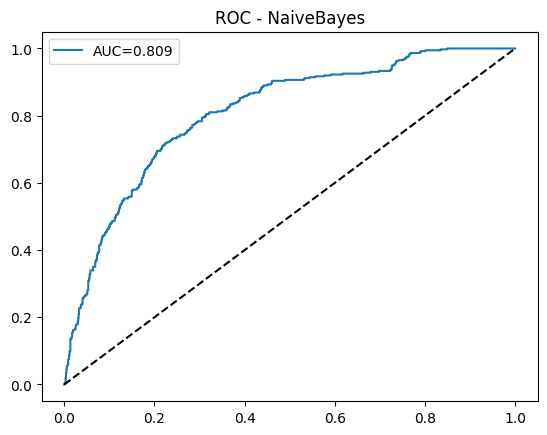

ROC AUC: 0.8093

Model comparison:


,accuracy
LogisticRegression,0.804826
SVM,0.794890
RandomForest,0.789922
KNN,0.762952
DecisionTree,0.742370
NaiveBayes,0.655784



Top feature importances (RandomForest):


,0
TotalCharges,0.194123
tenure,0.171364
MonthlyCharges,0.167562
InternetService_Fiber optic,0.038864
PaymentMethod_Electronic check,0.038285
Contract_Two year,0.031477
gender_Male,0.028519
OnlineSecurity_Yes,0.027796
PaperlessBilling_Yes,0.025725
Partner_Yes,0.023285


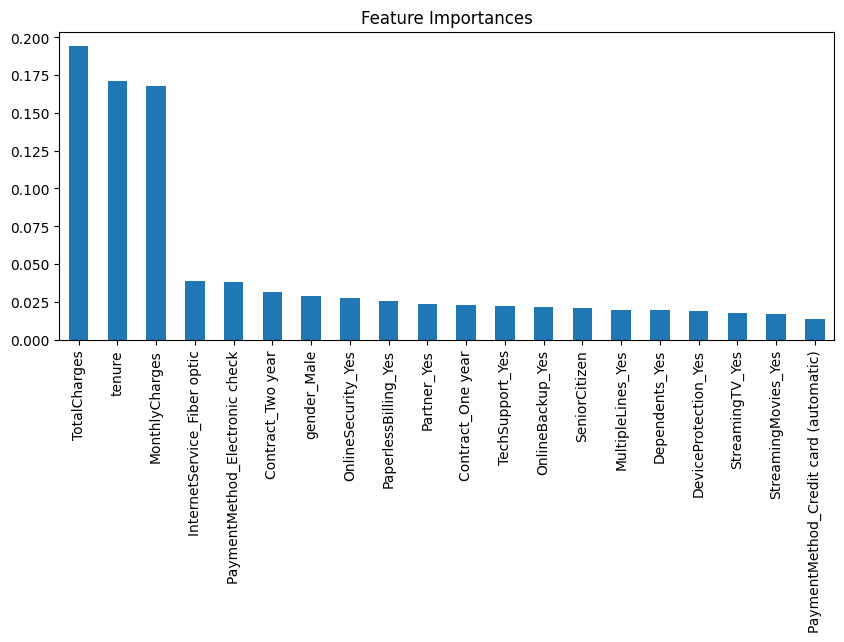

Best model: LogisticRegression
Saved best model to best_telco_model.joblib


In [23]:
# Full Telco Churn pipeline (ready-to-run)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

# Load
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop ID
df.drop(columns=['customerID'], inplace=True)

# Encode target
le = LabelEncoder(); df['Churn'] = le.fit_transform(df['Churn'])

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numeric
num_cols = ['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Features and target
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Train/test split (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "NaiveBayes": GaussianNB()
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\n======================")
    print(name)
    print("======================")
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", round(acc,4))
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}"); plt.show()
    try:
        y_prob = clf.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"AUC={auc:.3f}"); plt.plot([0,1],[0,1],'k--'); plt.title(f"ROC - {name}"); plt.legend(); plt.show()
        print("ROC AUC:", round(auc,4))
    except:
        print("ROC AUC not available.")
    results[name] = acc

# Summary
res_df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy']).sort_values(by='accuracy', ascending=False)
print("\nModel comparison:")
display(res_df)

# Feature importance from RandomForest
rf = models['RandomForest']
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
print("\nTop feature importances (RandomForest):")
display(feat_imp)
plt.figure(figsize=(10,4)); feat_imp.plot(kind='bar'); plt.title("Feature Importances"); plt.show()

# Save best
best_model_name = res_df.index[0]
print("Best model:", best_model_name)
joblib.dump(models[best_model_name], "best_telco_model.joblib")
print("Saved best model to best_telco_model.joblib")
